## Customer Personality Analysis
This project analyze the marketing_campaign dataset to try and understand connections between 
customer charactaristics to the amount of products he buys.

### 0. Imports

In [12]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

import warnings
warnings.filterwarnings("ignore")


### 1. Introducing marketing dataset

In [13]:
dtf = pd.read_csv("./data/marketing_campaign.csv", index_col=0, delimiter='\t')
cols = ['Year_Birth','Education','Marital_Status','Income',	'Kidhome','Teenhome','Dt_Customer',	'Recency', 'TotalMntProducts','NumDealsPurchases'	,'NumWebPurchases',	'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Complain']
total_products = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
# summing the total products:
dtf['TotalMntProducts'] = dtf[total_products].sum(axis=1)
# remove total products:
dtf = dtf.drop(total_products, axis=1)
dtf = dtf[cols]
dtf.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,TotalMntProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
ID,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,1617,3,8,10,4,7,0,0,0,0,0,0
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,27,2,1,1,2,5,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,776,1,8,2,10,4,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,53,2,2,0,4,6,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,422,5,5,3,6,5,0,0,0,0,0,0


In [14]:
dtf.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,TotalMntProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,605.798214,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375
std,11.984069,25173.076661,0.538398,0.544538,28.962453,602.249288,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,68.750000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,396.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,1045.500000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


First let's understand what total products is built from.


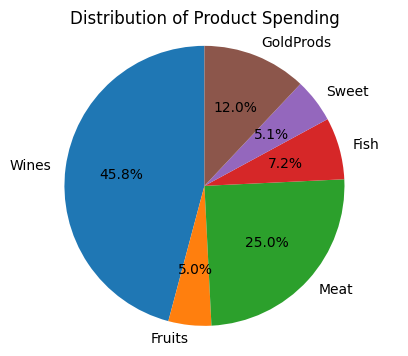

In [33]:
df = pd.read_csv("./data/marketing_campaign.csv", index_col=0, delimiter='\t')
total_products = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['TotalMntProducts'] = df[total_products].sum(axis=1)

percentages = pd.DataFrame()
for col in total_products:
    percentages[col] = df[col] / df['TotalMntProducts']

df.drop('TotalMntProducts', axis=1, inplace=True)
mean_percentages = percentages.mean()

plt.figure(figsize=(5, 4))
plt.pie(mean_percentages, 
        labels=[col.replace('Mnt', '').replace('Products', '') for col in total_products],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Distribution of Product Spending')
plt.axis('equal')
plt.show()



#### Examining the target features - total products spending(combination of different products) 
we want to understand better our target audience that buys the most total products.

first we'll check how income effect the total number of products, to better understand our customers.

Text(0, 0.5, 'Amount of Products')

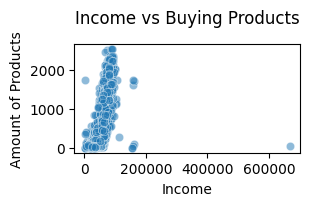

In [20]:
plt.subplot(3, 2, 1)
sns.scatterplot(data=dtf, x='Income', y='TotalMntProducts', alpha=0.5)
plt.title('Income vs Buying Products', fontsize=12, pad=15)
plt.xlabel('Income')
plt.ylabel('Amount of Products')

In this graph we can't see clearly the effect of income because of of outliers. We will build a new graph that filters this value.

Text(0, 0.5, 'Amount of Products')

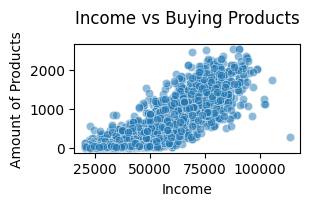

In [ ]:
plt.subplot(3, 2, 1)
remove_outliers = dtf[dtf['Income']<150000]
remove_outliers = remove_outliers[remove_outliers['Income'] >20000]
sns.scatterplot(data=remove_outliers, x='Income', y='TotalMntProducts', alpha=0.5)
plt.title('Income vs Buying Products', fontsize=12, pad=15)
plt.xlabel('Income')
plt.ylabel('Amount of Products')

Now we can see better the effect of income now. from the graph it seems the effect of income is not exactly linear but close to being one. We can see that the amount of products is similar when the income is less then 50k. between 50-75k there is also simliarity and over 75k we can see clear rising in the amount of products.

Text(0, 0.5, 'Count')

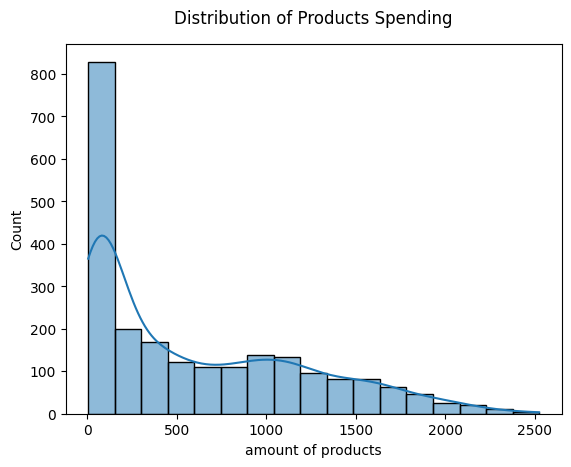

In [25]:
sns.histplot(data=dtf, x='TotalMntProducts', kde=True)
plt.title('Distribution of Products Spending', fontsize=12, pad=15)
plt.xlabel('amount of products')
plt.ylabel('Count')

This histogram tells us that most of the people tend to buy 0-500 products. then there are few that buy more then 2000, but the number is insignificant.
Also this distribution is a long tail, and right skewed. There is also second small peak at the middle which tells us there are relativley large amount of customers who buy in large amounts.

We saw in the data that there are 3 platforms to buy products. We will create a graph that will show which platform is the most profitable.

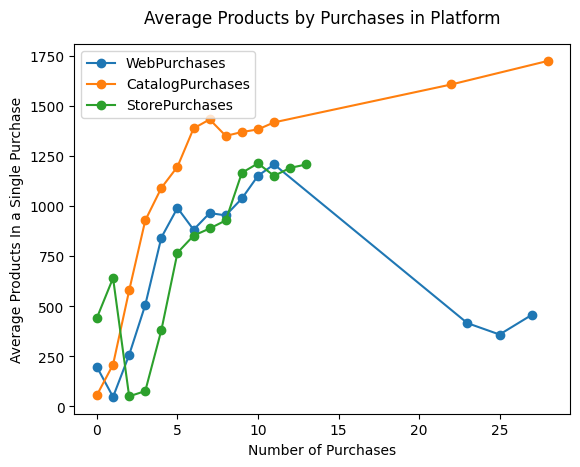

In [28]:
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_spending = []
for col in purchase_cols:
    spending_by_purchases = dtf.groupby(col)['TotalMntProducts'].mean().reset_index()
    plt.plot(spending_by_purchases[col], spending_by_purchases['TotalMntProducts'], 
             marker='o', label=col.replace('Num', ''))
plt.title('Average Products by Purchases in Platform', fontsize=12, pad=15)
plt.xlabel('Number of Purchases')
plt.ylabel('Average Products In a Single Purchase')
plt.legend()

We can learn from it that web and catalouge customers tend to return more.Also cataloge costumers have higher tendency to buy in large numbers.

Next, we will look at heatmap to get a better understanding about which features effect the most on our target

<Axes: >

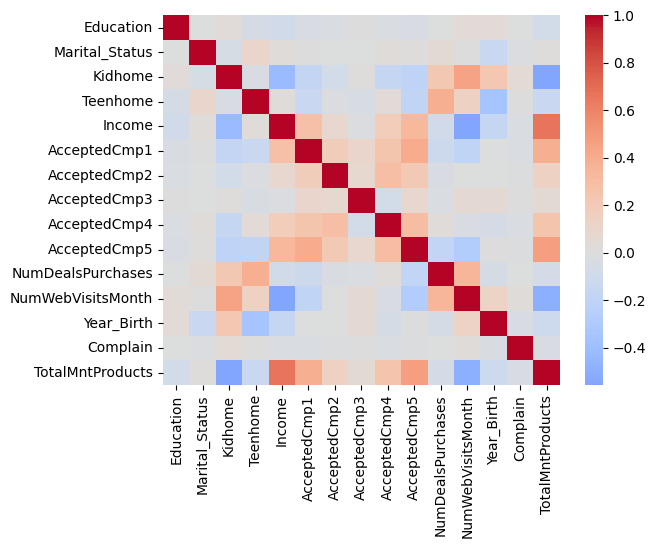

In [41]:
spending_cols = ['Education','Marital_Status','Kidhome','Teenhome',
                 'Income', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','NumDealsPurchases','NumWebVisitsMonth', 'Year_Birth', 'Complain', 'TotalMntProducts']
transform_categorial_cols = ['Education', 'Marital_Status' ]
# transform string categorial columns to numerical:
dtf[transform_categorial_cols] = dtf[transform_categorial_cols].apply(lambda x: pd.factorize(x)[0])
sns.heatmap(dtf[spending_cols].corr() ,cmap='coolwarm', center=0)


And now a "zoom in" on our target feature:

<Axes: >

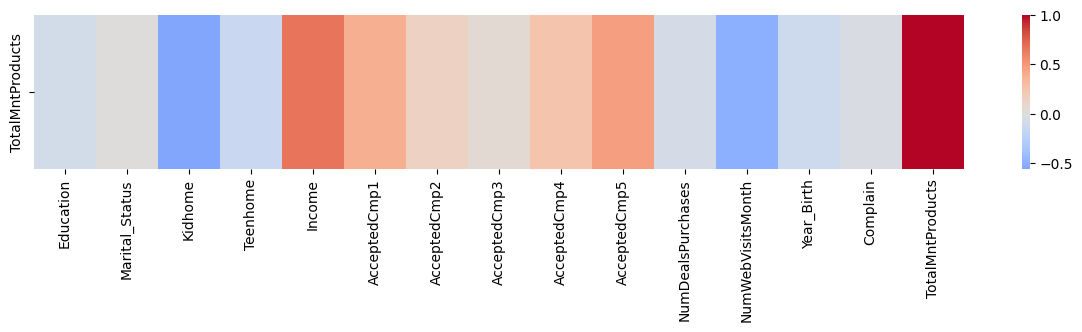

In [79]:
spending_cols = ['Education','Marital_Status','Kidhome','Teenhome',
                'Income', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','NumDealsPurchases','NumWebVisitsMonth', 'Year_Birth', 'Complain', 'TotalMntProducts']
transform_categorial_cols = ['Education', 'Marital_Status' ]

# transform string categorial columns to numerical:
dtf[transform_categorial_cols] = dtf[transform_categorial_cols].apply(lambda x: pd.factorize(x)[0])
fig, ax = plt.subplots(figsize=(15,2))
sns.heatmap(dtf[spending_cols].corr().loc[['TotalMntProducts']] ,cmap='coolwarm', center=0)


This graph tells us which features have positive/negative impact on buying products. we can see that income has strong positive correlation, the campaigns have also positive correlation while kids and teens have negative correlation. We can also see that the first and fifth campaign brought us much more customers then the 2-4 campaign. so we should keep going with similar campagins as 1 and 5.

After seeing the correlation map it's intersting to see exactly how kids and teens effect our target feature. That's because it's unclear why kids effect negativly. let's go deeper into it by the next graph.

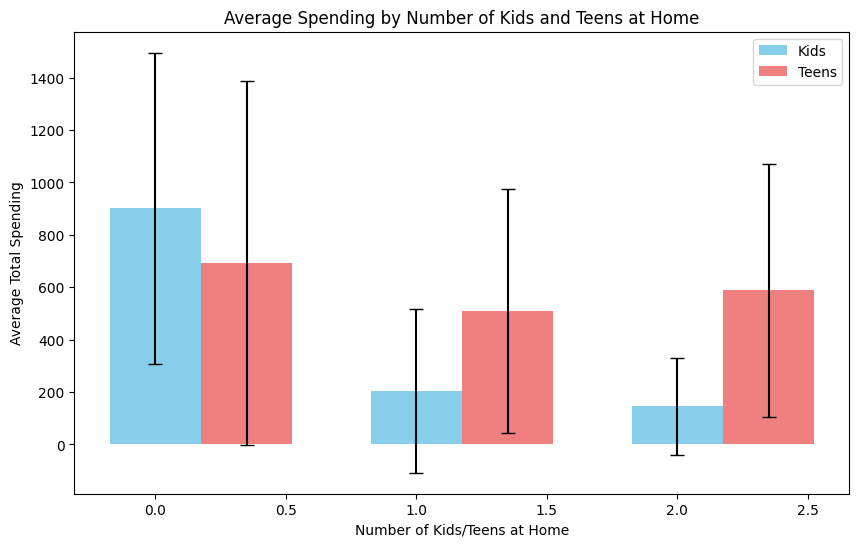

In [29]:
# Calculate averages
avg_spending_by_kids = dtf.groupby('Kidhome')['TotalMntProducts'].agg(['mean', 'std']).reset_index()
avg_spending_by_teens = dtf.groupby('Teenhome')['TotalMntProducts'].agg(['mean', 'std']).reset_index()

# Set width of bars and positions
bar_width = 0.35
r1 = np.arange(len(avg_spending_by_kids))
r2 = [x + bar_width for x in r1]

# Create grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, avg_spending_by_kids['mean'], 
        width=bar_width, 
        yerr=avg_spending_by_kids['std'], 
        capsize=5, 
        label='Kids',
        color='skyblue')
plt.bar(r2, avg_spending_by_teens['mean'], 
        width=bar_width, 
        yerr=avg_spending_by_teens['std'], 
        capsize=5, 
        label='Teens',
        color='lightcoral')

plt.xlabel('Number of Kids/Teens at Home')
plt.ylabel('Average Total Spending')
plt.title('Average Spending by Number of Kids and Teens at Home')
plt.legend()


This graph shows that the more kids and teens at home, the less spending on products. This is likely because families with more children have less disposable income to spend on items from this store.
It's important to notice that kids have much more effect then teens, which is intresting.
Now it's clearer that we should'nt target parents with young kids. parents with teens are fine.

R2 Score: 0.852
Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.338
Mean Absolute Error (Σ|y - pred|/n): 131
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 229
Max Error: 1,564


<Axes: ylabel='TotalMntProducts'>

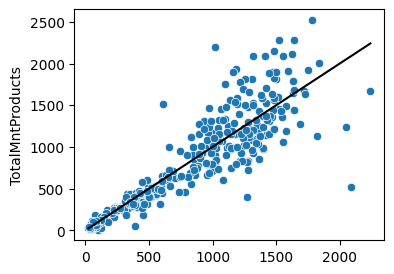

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
import matplotlib.pyplot as plt

X = dtf.drop(['TotalMntProducts'], axis=1)
y = dtf['TotalMntProducts']

transform_categorial_cols = ['Education', 'Marital_Status' ]

# transform string categorial columns to numerical:
X[transform_categorial_cols] = X[transform_categorial_cols].apply(lambda x: pd.factorize(x)[0])

# Drop non-numeric columns 
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X = X[numeric_cols]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train basic XGBoost model
# Using simple parameters to ensure the model isn't too powerful
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

# 3. Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model
print("R2 Score:", "{:,.3f}".format(r2_score(y_test, y_pred_test)))
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,y_pred_test)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, y_pred_test)))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

## residuals
residuals = y_test - y_pred_test
max_error = residuals.abs().max()
print("Max Error:", "{:,.0f}".format(max_error))


fig, ax = plt.subplots(figsize=(4,3))
sns.scatterplot(x=y_pred_test ,y=y_test,ax=ax)
sns.lineplot(x=y_pred_test, y=y_pred_test,ax=ax,color='black')


We can clearly see that as the amount of products go up the prediction error gets worse. 

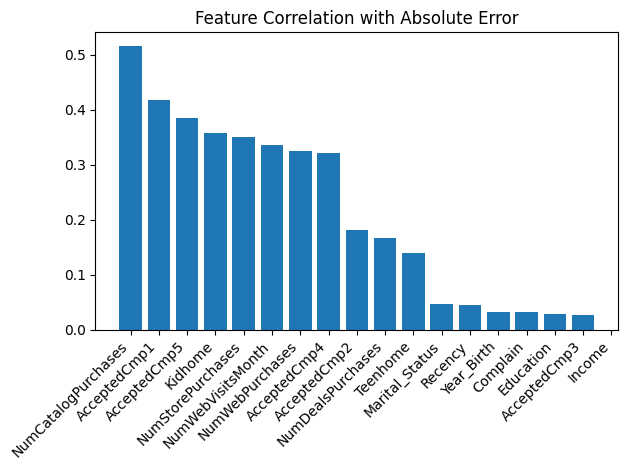

In [54]:
feature_names = X.columns
errors = y_test - y_pred_test
abs_errors = np.abs(errors)
percent_errors = (errors / y_test) * 100
feature_error_corr = pd.DataFrame()
for feature in feature_names:
    feature_error_corr.loc[feature, 'Error_Correlation'] = np.corrcoef(X_test[feature], abs_errors)[0,1]

# Sort features by absolute correlation with error
feature_error_corr['Abs_Correlation'] = abs(feature_error_corr['Error_Correlation'])
feature_error_corr = feature_error_corr.sort_values('Abs_Correlation', ascending=False)

plt.bar(range(len(feature_error_corr)), feature_error_corr['Abs_Correlation'])
plt.xticks(range(len(feature_error_corr)), feature_error_corr.index, rotation=45, ha='right')
plt.title('Feature Correlation with Absolute Error')
plt.tight_layout()
plt.show()

This graph tells us that there is a large correlation between some features and the errors that the model does. NumCatalog and the 1,5 have high impact that sabotages the predictions.

In [50]:
bias_stats = {
    'Over_predictions': (errors < 0).mean() * 100,
    'Under_predictions': (errors > 0).mean() * 100,
    'Mean_positive_error': errors[errors > 0].mean(),
    'Mean_negative_error': errors[errors < 0].mean()
}

print("\nBias Analysis:")
for key, value in bias_stats.items():
    print(f"{key}: {value:.2f}")


Bias Analysis:
Over_predictions: 56.25
Under_predictions: 43.75
Mean_positive_error: 148.31
Mean_negative_error: -118.29


This results show us that the model overestimates then underestimates. also when it overestimates it's in larger numbers.

<Axes: >

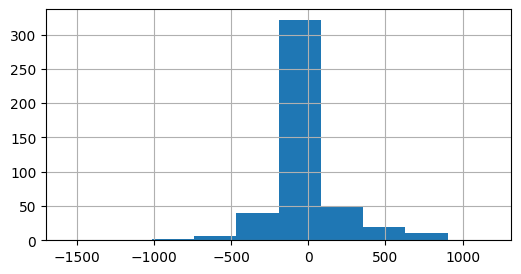

In [53]:
plt.figure(figsize=(6, 3))
residuals.hist()

This shows us that the model mostly accuracte (peak around zero) but it's also has mistakes, and large ones(we can see bins around 1000, -1000). We can see that the right side is slightly bigger which supports our claim of overestimations of the model.